In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#

In [ ]:
df = pd.read_csv('/content/base_final.csv')
df.tail(10)

,pk_indicador,indicador,variavel_abertura_1,categoria_abertura_1,variavel_abertura_2,categoria_abertura_2,Maio,Junho,julho
979,126,População residente (mil pessoas),Grupos de Idade 2,60 anos ou mais,Plano de Saúde Médico,Não tem plano de saúde médico,5 672,5 780,5 826
980,126,População residente (mil pessoas),Grupos de Idade 2,60 anos ou mais,Plano de Saúde Médico,Tem plano de saúde médico,1 859,1 707,1 683
981,126,População residente (mil pessoas),Grupos de Idade 2,60 anos ou mais,Plano de Saúde Médico,Não tem plano de saúde médico,1 324,1 338,1 348
982,126,População residente (mil pessoas),Grupos de Idade 2,60 anos ou mais,Plano de Saúde Médico,Tem plano de saúde médico,282,262,259
983,126,População residente (mil pessoas),Grupos de Idade 2,60 anos ou mais,Plano de Saúde Médico,Não tem plano de saúde médico,8 212,8 509,8 549
984,126,População residente (mil pessoas),Grupos de Idade 2,60 anos ou mais,Plano de Saúde Médico,Não tem plano de saúde médico,3 118,3 267,3 321
985,126,População residente (mil pessoas),Grupos de Idade 2,60 anos ou mais,Plano de Saúde Médico,Não tem plano de saúde médico,1 305,1 341,1 354
986,126,População residente (mil pessoas),Grupos de Idade 2,60 anos ou mais,Plano de Saúde Médico,Tem plano de saúde médico,646,614,609
987,126,População residente (mil pessoas),Grupos de Idade 2,60 anos ou mais,Plano de Saúde Médico,Tem plano de saúde médico,5 957,5 650,5 704
988,126,População residente (mil pessoas),Grupos de Idade 2,60 anos ou mais,Plano de Saúde Médico,Tem plano de saúde médico,1 514,1 402,1 392


In [ ]:
df['indicador'].unique()

array(['Pessoas que apresentaram algum dos sintoma(s) (mil pessoas)',
       'Pessoas que apresentaram o sintoma de perda de cheiro ou de sabor (mil pessoas)',
       'Pessoas que apresentaram os sintomas de tosse, febre e dificuldade para respirar (mil pessoas) ',
       'Pessoas que apresentaram os sintomas de tosse, febre e dor no peito (mil pessoas)',
       'Pessoas que apresentaram sintomas referenciados conjugados3 (mil pessoas)',
       'Pessoas que foram internadas e que procuraram hospital (mil pessoas)',
       'Pessoas que foram internadas em hospital e ficaram sedadas, intubadas e com respiração artificial (mil pessoas) ',
       'Pessoas que foram internadas em hospital e ficaram sedadas, intubadas e com respiração artificial, tendo apresentado sintomas referenciados conjugados3 (mil pessoas)',
       'Pessoas que foram internadas entre aquelas que procuraram hospital e apresentaram sintomas referenciados conjugados3 (mil pessoas)',
       'Pessoas que não procuraram aten

In [ ]:
df.Maio = df.Maio.str.replace(" ","").astype(int)
df.Junho = df.Junho.str.replace(" ","").astype(int)
df.julho = df.julho.str.replace(" ","").astype(int)


# Pessoas que apresentaram os sintomas de tosse, febre e dor no peito (mil pessoas)

### Pessoas que apresentaram os sintomas de tosse, febre e dor no peito (mil pessoas) por sexo


In [ ]:
df_indicador_110 = df[df['pk_indicador']== 110]


In [ ]:
df_indicador_110_sexo = df_indicador_110[df_indicador_110['variavel_abertura_1'] == 'Sexo']
df_indicador_110_sexo = df_indicador_110_sexo.groupby('categoria_abertura_1')[['Maio','Junho','julho']].sum()
df_indicador_110_sexo.reset_index(inplace=True)

In [ ]:
df_indicador_110_sexo.columns = ['Sexo','Maio','Junho','Julho']
df_indicador_110_sexo.set_index('Sexo',inplace=True)
df_indicador_110_sexo

,Maio,Junho,Julho
Sexo,,,
Homem,951,553,478
Mulher,1032,607,600


#### Grafico dos meses

In [ ]:
# unindo os meses
df_indicador_110_sexo['Total'] = df_indicador_110_sexo['Maio'] + df_indicador_110_sexo['Junho'] + df_indicador_110_sexo['Julho']
df_indicador_110_sexo

,Maio,Junho,Julho,Total
Sexo,,,,
Homem,951,553,478,1982
Mulher,1032,607,600,2239


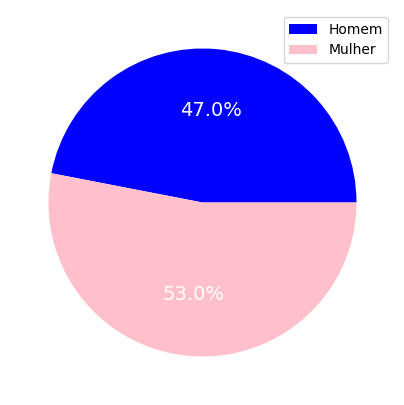

In [ ]:
# criando de pizza com os valores totais por sexo

labels = df_indicador_110_sexo.index
sizes = [5, 5]
colors = ['blue', 'pink']
graf = df_indicador_110_sexo.plot.pie(y='Total',x='Sexo',figsize=sizes, colors=colors, autopct='%1.1f%%',textprops={'color': 'white', 'fontsize': 14})
plt.axis('off')
plt.legend(labels, loc="best")

plt.show()

texto

In [ ]:
df_indicador_110_sexo.drop('Total',axis=1,inplace=True)
df_indicador_110_sexo.reset_index(inplace=True)


In [ ]:
df_indicador_110_sexo_melt =  df_indicador_110_sexo.melt(id_vars=['Sexo'],var_name='mes',value_name='%')

In [ ]:
df_indicador_110_sexo_melt_mulher = df_indicador_110_sexo_melt[df_indicador_110_sexo_melt['Sexo'] == 'Mulher']
df_indicador_110_sexo_melt_homem = df_indicador_110_sexo_melt[df_indicador_110_sexo_melt['Sexo'] == 'Homem']

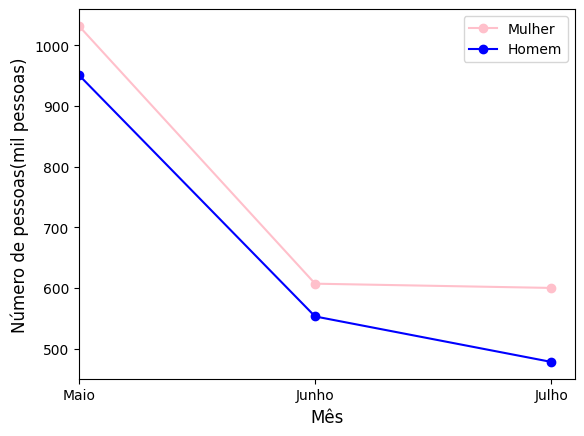

In [ ]:
# Plotar a linha para as mulheres
plt.plot(df_indicador_110_sexo_melt_mulher['mes'],
         df_indicador_110_sexo_melt_mulher['%'],
         marker='o', color='pink', label='Mulher')

# Plotar a linha para os homens
plt.plot(df_indicador_110_sexo_melt_homem['mes'],
         df_indicador_110_sexo_melt_homem['%'],
         marker='o', color='blue', label='Homem')

# Personalizar o eixo x para começar em zero
plt.xlim(left=0)

# Adicionar título e rótulos aos eixos
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Número de pessoas(mil pessoas)', fontsize=12)

# Exibir a legenda
plt.legend()

# Mostrar o gráfico
plt.show()

### Pessoas que apresentaram os sintomas de tosse, febre e dor no peito (mil pessoas) por Idade

In [ ]:
df_indicador_110_idade = df_indicador_110[df_indicador_110['variavel_abertura_1'] == 'Grupos de Idade 2']

In [ ]:
df_indicador_110_idade = df_indicador_110_idade[['categoria_abertura_1','Maio','Junho','julho']]
df_indicador_110_idade.columns = ['Idade','Maio','Junho','Julho']
df_indicador_110_idade

,Idade,Maio,Junho,Julho
241,0 a 59 anos,895,527,474
247,60 anos ou mais,96,53,66


In [ ]:
# unindo os meses
df_indicador_110_idade['Total'] = df_indicador_110_idade['Maio'] + df_indicador_110_idade['Junho'] + df_indicador_110_idade['Julho']
df_indicador_110_idade

,Idade,Maio,Junho,Julho,Total
241,0 a 59 anos,895,527,474,1896
247,60 anos ou mais,96,53,66,215


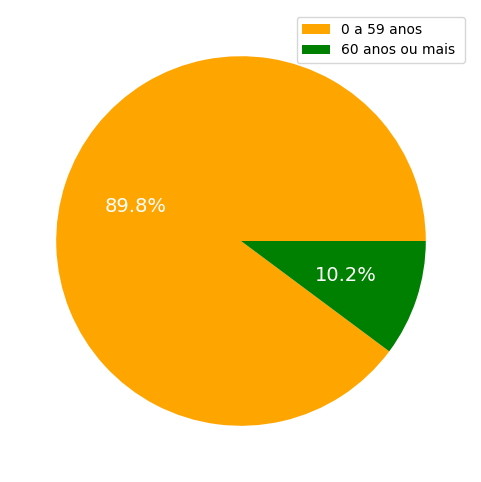

In [ ]:
# criando de pizza com os valores totais por sexo

labels = df_indicador_110_idade['Idade']
sizes = [6, 6]
colors = ['orange', 'green']
graf = df_indicador_110_idade.plot.pie(y='Total',x='Idade',figsize=sizes, colors=colors, autopct='%1.1f%%',textprops={'color': 'white', 'fontsize': 14})
plt.axis('off')
plt.legend(labels, loc="best")

plt.show()

In [ ]:
df_indicador_110_idade.drop('Total',axis=1,inplace=True)


In [ ]:
df_indicador_110_idade_melt =  df_indicador_110_idade.melt(id_vars=['Idade'],var_name='mes',value_name='%')

In [ ]:
df_indicador_110_idade_melt['Idade'].unique()

array(['0 a 59 anos ', '60 anos ou mais '], dtype=object)

In [ ]:
df_indicador_110_idade_melt_idoso = df_indicador_110_idade_melt[df_indicador_110_idade_melt['Idade'] == '60 anos ou mais ']
df_indicador_110_idade_melt_restante = df_indicador_110_idade_melt[df_indicador_110_idade_melt['Idade'] == '0 a 59 anos ']

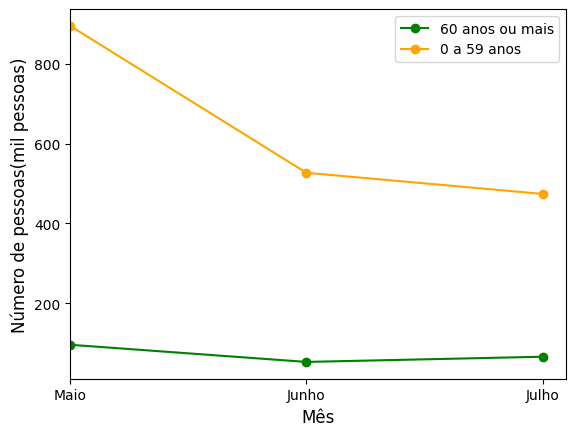

In [ ]:
# Plotar a linha para as mulheres
plt.plot(df_indicador_110_idade_melt_idoso['mes'],
         df_indicador_110_idade_melt_idoso['%'],
         marker='o', color='green', label='60 anos ou mais')

# Plotar a linha para os homens
plt.plot(df_indicador_110_idade_melt_restante['mes'],
         df_indicador_110_idade_melt_restante['%'],
         marker='o', color='orange', label='0 a 59 anos')

# Personalizar o eixo x para começar em zero
plt.xlim(left=0)

# Adicionar título e rótulos aos eixos
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Número de pessoas(mil pessoas)', fontsize=12)

# Exibir a legenda
plt.legend()

# Mostrar o gráfico
plt.show()

# Pessoas que foram internadas e que procuraram hospital (mil pessoas)

In [ ]:
df_indicador_117 = df[df['pk_indicador']== 117]

In [ ]:
df_indicador_117

,pk_indicador,indicador,variavel_abertura_1,categoria_abertura_1,variavel_abertura_2,categoria_abertura_2,Maio,Junho,julho
409,117,Pessoas que foram internadas e que procuraram ...,Sexo,Homem,NaN,NaN,67,63,73
410,117,Pessoas que foram internadas e que procuraram ...,Cor ou Raça,Branca,NaN,NaN,48,45,60
411,117,Pessoas que foram internadas e que procuraram ...,Sexo,Mulher,NaN,NaN,46,51,64
412,117,Pessoas que foram internadas e que procuraram ...,Grupos de Idade 2,0 a 59 anos,NaN,NaN,66,65,87
413,117,Pessoas que foram internadas e que procuraram ...,Cor ou Raça,Preta ou parda,NaN,NaN,63,69,78
414,117,Pessoas que foram internadas e que procuraram ...,Grupos de Idade 2,60 anos ou mais,NaN,NaN,46,49,51
415,117,Pessoas que foram internadas e que procuraram ...,NaN,NaN,NaN,NaN,15,19,15
416,117,Pessoas que foram internadas e que procuraram ...,NaN,NaN,NaN,NaN,7,7,15
417,117,Pessoas que foram internadas e que procuraram ...,NaN,NaN,NaN,NaN,54,37,61
418,117,Pessoas que foram internadas e que procuraram ...,NaN,NaN,NaN,NaN,20,35,36


## Pessoas que foram internadas e que procuraram hospital (mil pessoas) por sexo

In [ ]:
df_indicador_117_sexo = df_indicador_117[df_indicador_117['variavel_abertura_1'] == 'Sexo']
df_indicador_117_sexo = df_indicador_117_sexo.groupby('categoria_abertura_1')[['Maio','Junho','julho']].sum()
df_indicador_117_sexo.reset_index(inplace=True)

In [ ]:
df_indicador_117_sexo.columns = ['Sexo','Maio','Junho','Julho']
df_indicador_117_sexo.set_index('Sexo',inplace=True)
df_indicador_117_sexo

,Maio,Junho,Julho
Sexo,,,
Homem,67,63,73
Mulher,46,51,64


#### Grafico dos meses

In [ ]:
# unindo os meses
df_indicador_117_sexo['Total'] = df_indicador_117_sexo['Maio'] + df_indicador_117_sexo['Junho'] + df_indicador_117_sexo['Julho']
df_indicador_117_sexo

,Maio,Junho,Julho,Total
Sexo,,,,
Homem,67,63,73,203
Mulher,46,51,64,161


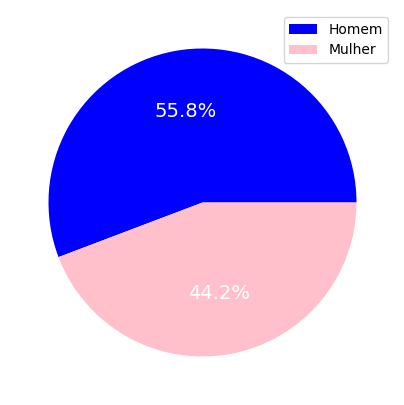

In [ ]:
# criando de pizza com os valores totais por sexo

labels = df_indicador_117_sexo.index
sizes = [5, 5]
colors = ['blue', 'pink']
graf = df_indicador_117_sexo.plot.pie(y='Total',x='Sexo',figsize=sizes, colors=colors, autopct='%1.1f%%',textprops={'color': 'white', 'fontsize': 14})
plt.axis('off')
plt.legend(labels, loc="best")

plt.show()

In [ ]:
df_indicador_117_sexo.drop('Total',axis=1,inplace=True)
df_indicador_117_sexo.reset_index(inplace=True)

In [ ]:
df_indicador_117_sexo_melt =  df_indicador_117_sexo.melt(id_vars=['Sexo'],var_name='mes',value_name='%')

In [ ]:
df_indicador_117_sexo_melt_mulher = df_indicador_117_sexo_melt[df_indicador_117_sexo_melt['Sexo'] == 'Mulher']
df_indicador_117_sexo_melt_homem = df_indicador_117_sexo_melt[df_indicador_117_sexo_melt['Sexo'] == 'Homem']

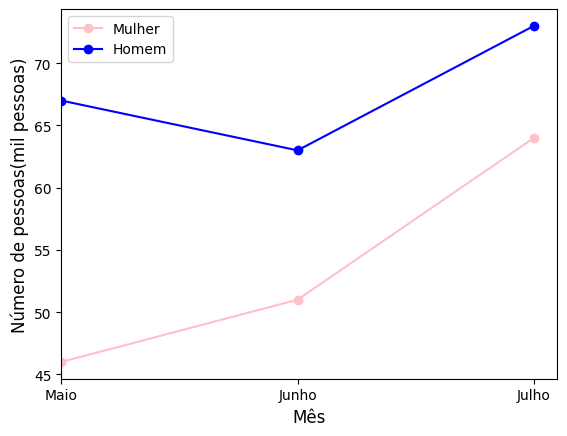

In [ ]:
# Plotar a linha para as mulheres
plt.plot(df_indicador_117_sexo_melt_mulher['mes'],
         df_indicador_117_sexo_melt_mulher['%'],
         marker='o', color='pink', label='Mulher')

# Plotar a linha para os homens
plt.plot(df_indicador_117_sexo_melt_homem['mes'],
         df_indicador_117_sexo_melt_homem['%'],
         marker='o', color='blue', label='Homem')

# Personalizar o eixo x para começar em zero
plt.xlim(left=0)

# Adicionar título e rótulos aos eixos

plt.xlabel('Mês', fontsize=12)
plt.ylabel('Número de pessoas(mil pessoas)', fontsize=12)

# Exibir a legenda
plt.legend()

# Mostrar o gráfico
plt.show()

## Pessoas que apresentaram os sintomas de tosse, febre e dor no peito (mil pessoas) por Idade

In [ ]:
df_indicador_117_idade = df_indicador_117[df_indicador_117['variavel_abertura_1'] == 'Grupos de Idade 2']

In [ ]:
df_indicador_117_idade = df_indicador_117_idade[['categoria_abertura_1','Maio','Junho','julho']]
df_indicador_117_idade.columns = ['Idade','Maio','Junho','Julho']
df_indicador_117_idade

,Idade,Maio,Junho,Julho
412,0 a 59 anos,66,65,87
414,60 anos ou mais,46,49,51


In [ ]:
# unindo os meses
df_indicador_117_idade['Total'] = df_indicador_117_idade['Maio'] + df_indicador_117_idade['Junho'] + df_indicador_117_idade['Julho']
df_indicador_117_idade

,Idade,Maio,Junho,Julho,Total
412,0 a 59 anos,66,65,87,218
414,60 anos ou mais,46,49,51,146


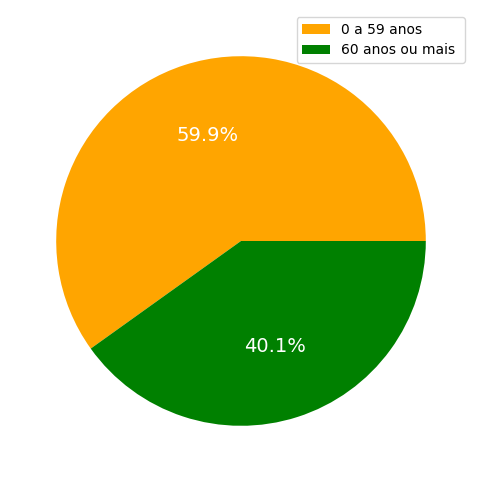

In [ ]:
# criando de pizza com os valores totais por sexo

labels = df_indicador_117_idade['Idade']
sizes = [6, 6]
colors = ['orange', 'green']
graf = df_indicador_117_idade.plot.pie(y='Total',x='Idade',figsize=sizes, colors=colors, autopct='%1.1f%%',textprops={'color': 'white', 'fontsize': 14})
plt.axis('off')
plt.legend(labels, loc="best")

plt.show()

In [ ]:
df_indicador_117_idade.drop('Total',axis=1,inplace=True)

In [ ]:
df_indicador_117_idade_melt =  df_indicador_117_idade.melt(id_vars=['Idade'],var_name='mes',value_name='%')

In [ ]:
df_indicador_117_idade_melt_idoso = df_indicador_117_idade_melt[df_indicador_110_idade_melt['Idade'] == '60 anos ou mais ']
df_indicador_117_idade_melt_restante = df_indicador_117_idade_melt[df_indicador_110_idade_melt['Idade'] == '0 a 59 anos ']

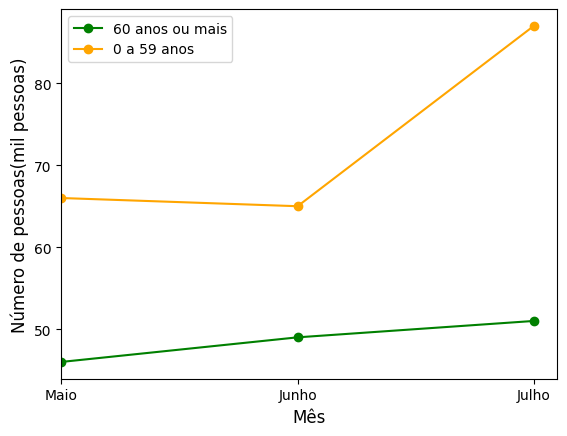

In [ ]:
# Plotar a linha para as mulheres
plt.plot(df_indicador_117_idade_melt_idoso['mes'],
         df_indicador_117_idade_melt_idoso['%'],
         marker='o', color='green', label='60 anos ou mais')

# Plotar a linha para os homens
plt.plot(df_indicador_117_idade_melt_restante['mes'],
         df_indicador_117_idade_melt_restante['%'],
         marker='o', color='orange', label='0 a 59 anos')

# Personalizar o eixo x para começar em zero
plt.xlim(left=0)

# Adicionar título e rótulos aos eixos
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Número de pessoas(mil pessoas)', fontsize=12)

# Exibir a legenda
plt.legend()

# Mostrar o gráfico
plt.show()

# Pessoas que foram internadas em hospital e ficaram sedadas, intubadas e com respiração artificial (mil pessoas)

In [ ]:
df_indicador_118 = df[df['pk_indicador']== 118]

### Pessoas que foram internadas em hospital e ficaram sedadas, intubadas e com respiração artificial (mil pessoas) por sexo

In [ ]:
df_indicador_118_sexo = df_indicador_118[df_indicador_118['variavel_abertura_1'] == 'Sexo']
df_indicador_118_sexo = df_indicador_118_sexo.groupby('categoria_abertura_1')[['Maio','Junho','julho']].sum()
df_indicador_118_sexo.reset_index(inplace=True)

In [ ]:
df_indicador_118_sexo.columns = ['Sexo','Maio','Junho','Julho']
df_indicador_118_sexo.set_index('Sexo',inplace=True)
df_indicador_118_sexo

,Maio,Junho,Julho
Sexo,,,
Homem,21,17,19
Mulher,10,8,17


##### Grafico de meses

In [ ]:
# unindo os meses
df_indicador_118_sexo['Total'] = df_indicador_118_sexo['Maio'] + df_indicador_118_sexo['Junho'] + df_indicador_118_sexo['Julho']
df_indicador_118_sexo

,Maio,Junho,Julho,Total
Sexo,,,,
Homem,21,17,19,57
Mulher,10,8,17,35


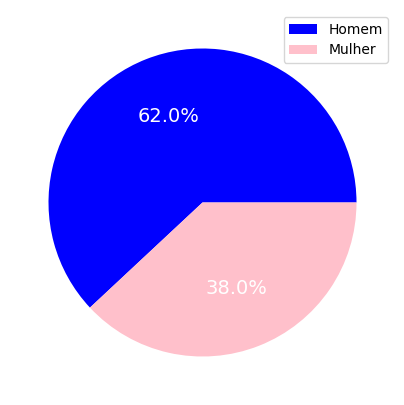

In [ ]:
# criando de pizza com os valores totais por sexo

labels = df_indicador_118_sexo.index
sizes = [5, 5]
colors = ['blue', 'pink']
graf = df_indicador_118_sexo.plot.pie(y='Total',x='Sexo',figsize=sizes, colors=colors, autopct='%1.1f%%',textprops={'color': 'white', 'fontsize': 14})
plt.axis('off')
plt.legend(labels, loc="best")

plt.show()

In [ ]:
df_indicador_118_sexo.drop('Total',axis=1,inplace=True)
df_indicador_118_sexo.reset_index(inplace=True)

In [ ]:
df_indicador_118_sexo_melt =  df_indicador_118_sexo.melt(id_vars=['Sexo'],var_name='mes',value_name='%')

In [ ]:
df_indicador_118_sexo_melt_mulher = df_indicador_118_sexo_melt[df_indicador_118_sexo_melt['Sexo'] == 'Mulher']
df_indicador_118_sexo_melt_homem = df_indicador_118_sexo_melt[df_indicador_118_sexo_melt['Sexo'] == 'Homem']

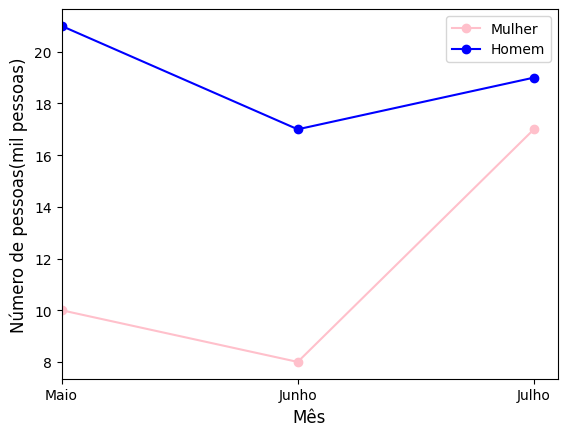

In [ ]:
# Plotar a linha para as mulheres
plt.plot(df_indicador_118_sexo_melt_mulher['mes'],
         df_indicador_118_sexo_melt_mulher['%'],
         marker='o', color='pink', label='Mulher')

# Plotar a linha para os homens
plt.plot(df_indicador_118_sexo_melt_homem['mes'],
         df_indicador_118_sexo_melt_homem['%'],
         marker='o', color='blue', label='Homem')

# Personalizar o eixo x para começar em zero
plt.xlim(left=0)

# Adicionar título e rótulos aos eixos
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Número de pessoas(mil pessoas)', fontsize=12)

# Exibir a legenda
plt.legend()

# Mostrar o gráfico
plt.show()

### Pessoas que foram internadas em hospital e ficaram sedadas, intubadas e com respiração artificial (mil pessoas) por idade

In [ ]:
df_indicador_118_idade = df_indicador_118[df_indicador_118['variavel_abertura_1'] == 'Grupos de Idade 2']

In [ ]:
df_indicador_118_idade = df_indicador_118_idade[['categoria_abertura_1','Maio','Junho','julho']]
df_indicador_118_idade.columns = ['Idade','Maio','Junho','Julho']
df_indicador_118_idade

,Idade,Maio,Junho,Julho
423,0 a 59 anos,19,15,20
425,60 anos ou mais,12,11,16


In [ ]:
# unindo os meses
df_indicador_118_idade['Total'] = df_indicador_118_idade['Maio'] + df_indicador_118_idade['Junho'] + df_indicador_118_idade['Julho']
df_indicador_118_idade

,Idade,Maio,Junho,Julho,Total
423,0 a 59 anos,19,15,20,54
425,60 anos ou mais,12,11,16,39


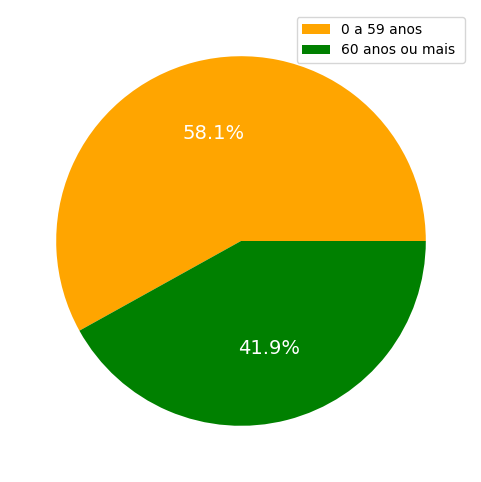

In [ ]:
# criando de pizza com os valores totais por sexo

labels = df_indicador_118_idade['Idade']
sizes = [6, 6]
colors = ['orange', 'green']
graf = df_indicador_118_idade.plot.pie(y='Total',x='Idade',figsize=sizes, colors=colors, autopct='%1.1f%%',textprops={'color': 'white', 'fontsize': 14})
plt.axis('off')
plt.legend(labels, loc="best")

plt.show()

In [ ]:
df_indicador_118_idade.drop('Total',axis=1,inplace=True)

In [ ]:
df_indicador_118_idade_melt =  df_indicador_118_idade.melt(id_vars=['Idade'],var_name='mes',value_name='%')

In [ ]:
df_indicador_118_idade_melt_idoso = df_indicador_118_idade_melt[df_indicador_118_idade_melt['Idade'] == '60 anos ou mais ']
df_indicador_118_idade_melt_restante = df_indicador_118_idade_melt[df_indicador_118_idade_melt['Idade'] == '0 a 59 anos ']

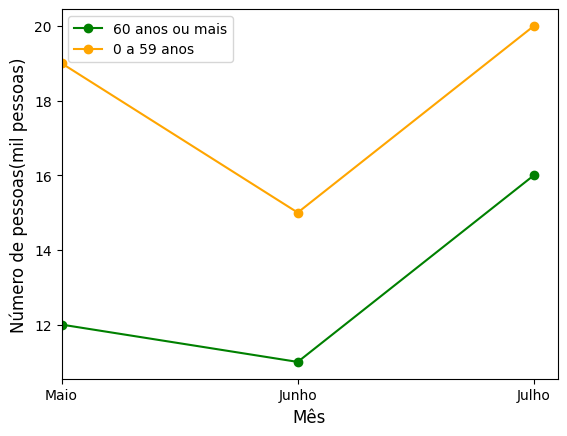

In [ ]:
# Plotar a linha para as mulheres
plt.plot(df_indicador_118_idade_melt_idoso['mes'],
         df_indicador_118_idade_melt_idoso['%'],
         marker='o', color='green', label='60 anos ou mais')

# Plotar a linha para os homens
plt.plot(df_indicador_118_idade_melt_restante['mes'],
         df_indicador_118_idade_melt_restante['%'],
         marker='o', color='orange', label='0 a 59 anos')

# Personalizar o eixo x para começar em zero
plt.xlim(left=0)

# Adicionar título e rótulos aos eixos
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Número de pessoas(mil pessoas)', fontsize=12)

# Exibir a legenda
plt.legend()

# Mostrar o gráfico
plt.show()